<a href="https://colab.research.google.com/github/Sergius-DS/Pytorch/blob/main/Lkd_Pytorch_Linear_Regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONSTRUIR UNA FUNCIÓN PARA VISUALIZAR

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,6))
  #Plot training data in BLUE
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #Plot test data in GREEN
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  #Plot predictions if they exist
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":14})


# COMENZAR CON EL MODELO LINEAL

In [ ]:
weight = 0.8
bias = 0.4
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [ ]:
X_regression[:5]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400]])

In [ ]:
y_regression[:5]

tensor([[0.4000],
        [0.4080],
        [0.4160],
        [0.4240],
        [0.4320]])

In [ ]:
#Separar Set de Entrenamiento y Prueba
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

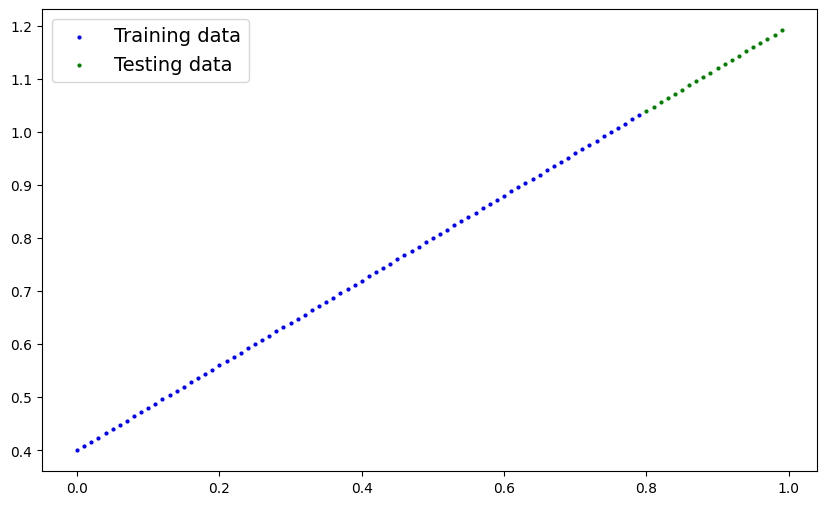

In [ ]:
#Visualizar lo avanzado sin predicciones hechas
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

In [ ]:
X_train_regression[:8]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700]])

In [ ]:
#Definiendo el Modelo NN
model_1 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [ ]:
#Configurar la Función de Pérdida y el Optimizador
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

In [ ]:
#Entrenar el Modelo
torch.manual_seed(48)
torch.cuda.manual_seed(48)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device),\
y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device),\
y_test_regression.to(device)

#Entrenamiento
for epoch in range(epochs):
  y_pred = model_1(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Prueba
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #Imprimir lo que va pasando
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {loss:.5f}")

Epoch: 0 | Loss: 0.86236 | Test Loss: 0.86236
Epoch: 100 | Loss: 0.09949 | Test Loss: 0.09949
Epoch: 200 | Loss: 0.00158 | Test Loss: 0.00158
Epoch: 300 | Loss: 0.00137 | Test Loss: 0.00137
Epoch: 400 | Loss: 0.00070 | Test Loss: 0.00070
Epoch: 500 | Loss: 0.00278 | Test Loss: 0.00278
Epoch: 600 | Loss: 0.00472 | Test Loss: 0.00472
Epoch: 700 | Loss: 0.00280 | Test Loss: 0.00280
Epoch: 800 | Loss: 0.00155 | Test Loss: 0.00155
Epoch: 900 | Loss: 0.00312 | Test Loss: 0.00312


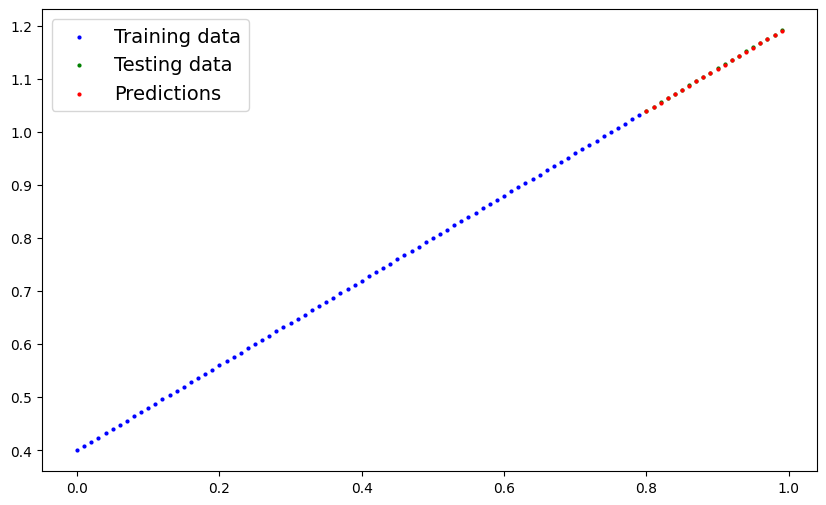

In [ ]:
#Activar Modo EVALUACIÓN
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test_regression)

  plot_predictions(
      train_data=X_train_regression.cpu(),
      train_labels=y_train_regression.cpu(),
      test_data= X_test_regression.cpu(),
      test_labels= y_test_regression.cpu(),
      predictions= y_preds.cpu()
  )